# CORE 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from CarlaBEV.src.planning.planner import Planner
from CarlaBEV.src.planning.graph_planner import GraphPlanner
from CarlaBEV.src.scenes import SceneBuilder

In [2]:
from CarlaBEV.envs.utils import load_map, map_to_rgb

rgbmap, _, semap_8 = load_map(size=1024)

rgbmap_8 = map_to_rgb(semap_8)
print(f"Image Size: {rgbmap.shape}")

Image Size: (10240, 8192, 3)


In [3]:
planner = GraphPlanner(graph_path='town01_centerline.pkl')

In [4]:
def plot_route_on_map(rgbmap, merged_path_coords):
    """
    Plots the route on top of the map.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(rgbmap)
    
    # Draw route
    if merged_path_coords.shape[0] > 1:
        plt.plot(merged_path_coords[:, 1], merged_path_coords[:, 0], 'r-', linewidth=3, label='Route')
        plt.scatter(merged_path_coords[0, 1], merged_path_coords[0, 0], c='green', s=100, label='Start')
        plt.scatter(merged_path_coords[-1, 1], merged_path_coords[-1, 0], c='red', s=100, label='End')

    plt.title("Shortest Path on Lane: Merged Route")
    plt.legend()
    plt.axis('off')
    plt.show()
    
def draw_scene(rgbmap, actors_dict):
    """
    Plots the route on top of the map.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(rgbmap)

    agent = actors_dict['agent']
    rx, ry = agent

    # Draw route
    plt.plot(rx, ry, 'r-', linewidth=1, label='Route')
    for px, py in zip(rx, ry):
        plt.scatter(px, py, c='k', s=3)

    plt.scatter(rx[0], ry[0], c='green', s=10, label='Start')
    plt.scatter(rx[-1], ry[-1], c='red', s=10, label='End')

    plt.title("Scene")
    plt.legend()
    plt.axis('off')
    plt.show()

In [5]:
def append_to_scene(scene_id, actor, class_id):
    scene = []
    start, goal = actor
    scene.append([scene_id, class_id, start, goal, None, None])
    return scene

def compute_routes_img(scene_df):
    for idx, row in scene_df.iterrows():
        id = 0
        _, class_id, start, goal, _, _ = row
        if class_id == "pedestrians":
            id = 1
        planner = Planner(id)
        rx, ry = planner.find_global_path(start, goal, 1024)
        scene_df.astype({'rx': "object", 'ry': "object"}).dtypes
        scene_df.loc[idx, "rx"] = rx
        scene_df.loc[idx, "ry"] = ry
    return scene_df

def compute_routes_graph(scene_df):
    lane = 'left'
    for idx, row in scene_df.iterrows():
        id = 0
        _, class_id, start, goal, _, _ = row
        if class_id == "pedestrians":
            id = 1
        planner = GraphPlanner(graph_path="planning_graph.pkl")
        rx, ry = planner.find_global_path(start, goal, lane)
        scene_df.astype({'rx': "object", 'ry': "object"}).dtypes
        scene_df.loc[idx, "rx"] = rx
        scene_df.loc[idx, "ry"] = ry
    return scene_df


def get_scene_df(scene_id, actors_dict):
    scene = []
    cols = ["scene_id", "class", "start", "goal", "rx", "ry"]
    for class_id in actors_dict.keys(): 
        for actors in actors_dict[class_id]:
            scene.extend(append_to_scene(scene_id, actors, class_id))

    scene_df = pd.DataFrame(scene, columns=cols)
    scene_df = compute_routes_graph(scene_df)
    scene_df.to_csv(f"../assets/scenes/{scene_id}.csv")
    return scene_df

# SCENES 

In [19]:
scene_id = "scene_1-1"

pedestrians = [
	[(8625, 4500), (8625, 1500)],
	[(8630, 2900), (8630, 1500)],
	[(8770, 6500), (8770, 1800)],
	[(8770, 1800), (8770, 6500)],
]

vehicles = [
	[(8730, 1800), (8730, 6500)],
	[(8730, 2300), (8730, 6500)],
	[(8650, 6500), (8650, 1500)],
	[(8650, 2900), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_11 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_11 = get_scene_df(scene_id, scene_dict_11)

In [13]:
scene_id = "scene_1-2"

pedestrians = [
    [(8625, 4500), (8625, 1500)],
    [(8630, 2900), (8630, 1500)],
    [(8770, 6500), (8770, 1800)],
]

vehicles = [
    [(8730, 2300), (8730, 6500)],
    [(8650, 6500), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_12 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_12 = get_scene_df(scene_id, scene_dict_12)

In [14]:
scene_id = "scene_1-3"
pedestrians = [
    [(8630, 2900), (8630, 1500)],
    [(8770, 1800), (8770, 6500)],
]


vehicles = [
    [(8730, 1800), (8730, 6500)],
    [(8730, 2300), (8730, 6500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_13 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_13 = get_scene_df(scene_id, scene_dict_13)

In [4]:
from CarlaBEV.src.scenes import SceneBuilder

In [6]:
scene_builder = SceneBuilder(["scene_1-0", "scene_1-1", "scene_1-2", "scene_1-3"], 128)
actors = scene_builder.get_scene_actors("scene_1-0")

# PLOT SCENES

In [9]:
# Output in high quality.
%config InlineBackend.figure_format='retina'
%matplotlib tk
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
# SCENE
scene_id = "scene-0"
# Find a route in the center lane within 2000 pixels
rx, ry = planner.find_random_route(
    lane_type='left',
    min_distance=500,
    max_distance=2000,
    merge_threshold=1
)

In [10]:
pedestrians = [
]

vehicles = [
]

agent = [
    [(rx[0], ry[0]), (rx[len(rx)-1], ry[len(ry)-1])]
]

debug_scene_dict = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df = get_scene_df(scene_id, debug_scene_dict)

In [ ]:
plot_route_on_map(rgbmap, np.array([[x, y] for x, y in zip(rx, ry)], dtype=np.int32))

# DEBUG 

In [ ]:
import networkx as nx
import random 

def display_random_route_from_waypoints(G_planning, rgbmap, min_distance=1000, max_distance=3000):
    pos = nx.get_node_attributes(G_planning, 'pos')
    # Filter to only centerline nodes
    waypoint_nodes = [n for n in G_planning.nodes if isinstance(n, str) and "_C_" in n]

    random.shuffle(waypoint_nodes)

    while True:
        start = random.choice(waypoint_nodes)
        end = random.choice(waypoint_nodes)
        if start == end:
            continue
        try:
            i, j, lane, k = parse_node_label(start)
            p1 = np.array([pos[start]])
        except:
            start = f'{j}-{i}_{lane}_{k}'

        try:
            i, j, lane, k = parse_node_label(end)
            p2 = np.array([pos[end]])
        except:
            end = f'{j}-{i}_{lane}_{k}'
            
        dist = np.linalg.norm(p1 - p2)

        if min_distance <= dist <= max_distance:
            try:
                path = nx.shortest_path(G_planning, start, end, weight='cost')
                coords = np.array([pos[n] for n in path])
                break
            except nx.NetworkXNoPath:
                continue

    # --- Visualization ---
    plt.figure(figsize=(10, 10))
    plt.imshow(rgbmap)
    plt.plot(coords[:, 0], coords[:, 1], 'r-', linewidth=2)
    plt.scatter(coords[:, 0], coords[:, 1], c='k', s=10)
    plt.scatter([coords[0, 0], coords[-1, 0]], [coords[0, 1], coords[-1, 1]], c=['green', 'red'], s=60)
    plt.title("Random Route Between Waypoints (Multi-turn)")
    plt.axis('off')
    plt.show()


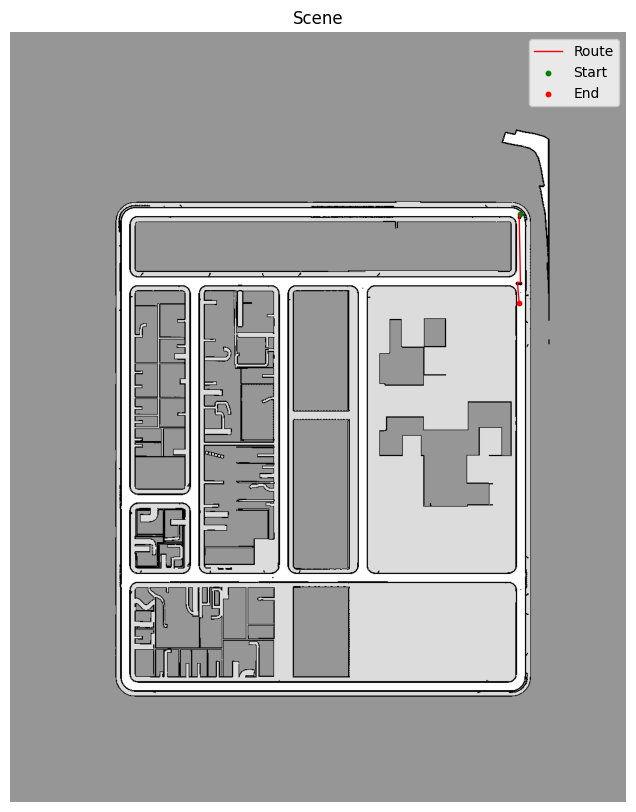

In [6]:
# SCENE
scene_id = "scene-debug"
# Find a route in the center lane within 2000 pixels
rx, ry = planner.find_random_route(
    lane_type='center',
    min_distance=500,
    max_distance=2000,
    merge_threshold=1
)

pedestrians = [
]

vehicles = [
]

agent = [
    [(rx[0], ry[0]), (rx[len(rx)-1], ry[len(ry)-1])]
]

debug_scene_dict = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df = get_scene_df(scene_id, debug_scene_dict)

scene_builder_1 = SceneBuilder([scene_id], 1024, semap_8)
scene_builder_8 = SceneBuilder([scene_id], 128, semap_8)

actors_1 = scene_builder_1.get_scene_actors(scene_id)
actors_8 = scene_builder_8.get_scene_actors(scene_id)

draw_scene(rgbmap_8, actors_8)

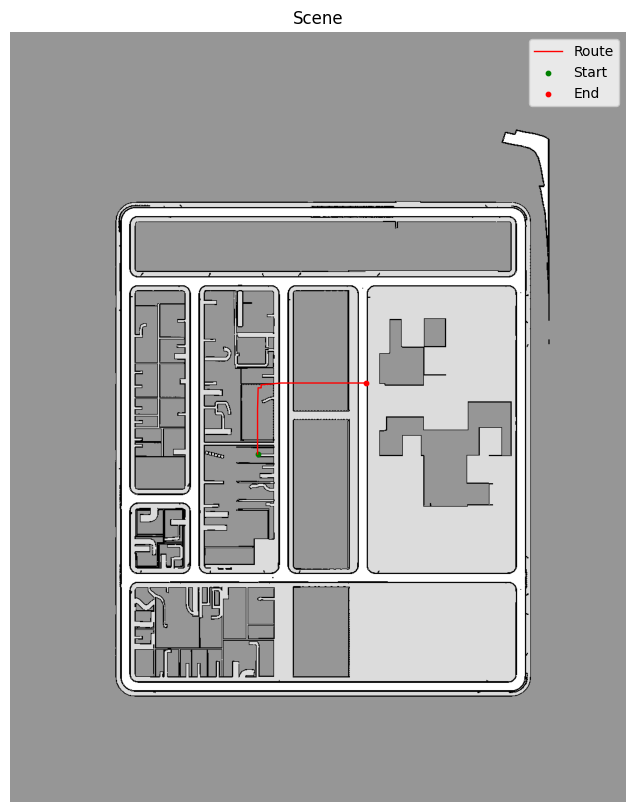

In [ ]:
scene_id = 'scene-0'
scene_builder_8 = SceneBuilder([scene_id], 128, semap_8)
actors_8 = scene_builder_8.get_scene_actors(scene_id)
draw_scene(rgbmap_8, actors_8)

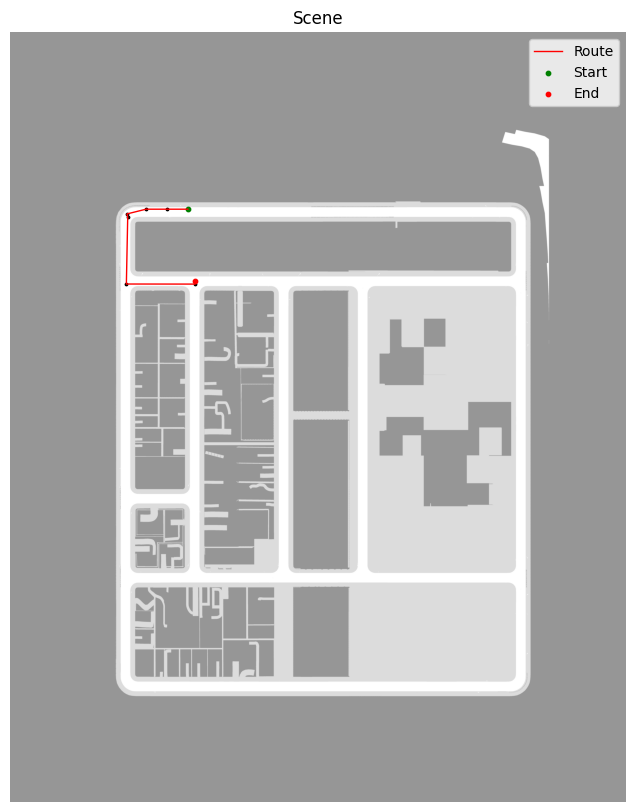

In [11]:
draw_scene(rgbmap, actors_1)